# References:

Assignment6 PDF <br>
https://github.com/NUOEL/cs6220/blob/master/M06-A01%20-%20Regression%20.ipynb <br>
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html <br> 
https://www.programcreek.com/python/example/56235/sklearn.cross_validation.train_test_split <br>
https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 <br>
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [2]:
# Load data
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL , names=['Sepal Length' , 'Sepal Width' , 'Petal Length' , 'Petal Width' , 'Species'] , header=None )
iris = iris.dropna()

# Scatter plot Matrix

In [3]:
import matplotlib.pyplot as pl

# Defining pairs function 
def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                pl.xlabel(col2)
                pl.ylabel(col1)
                #t = pl.title(name)
            i += 1
            
    pl.show()

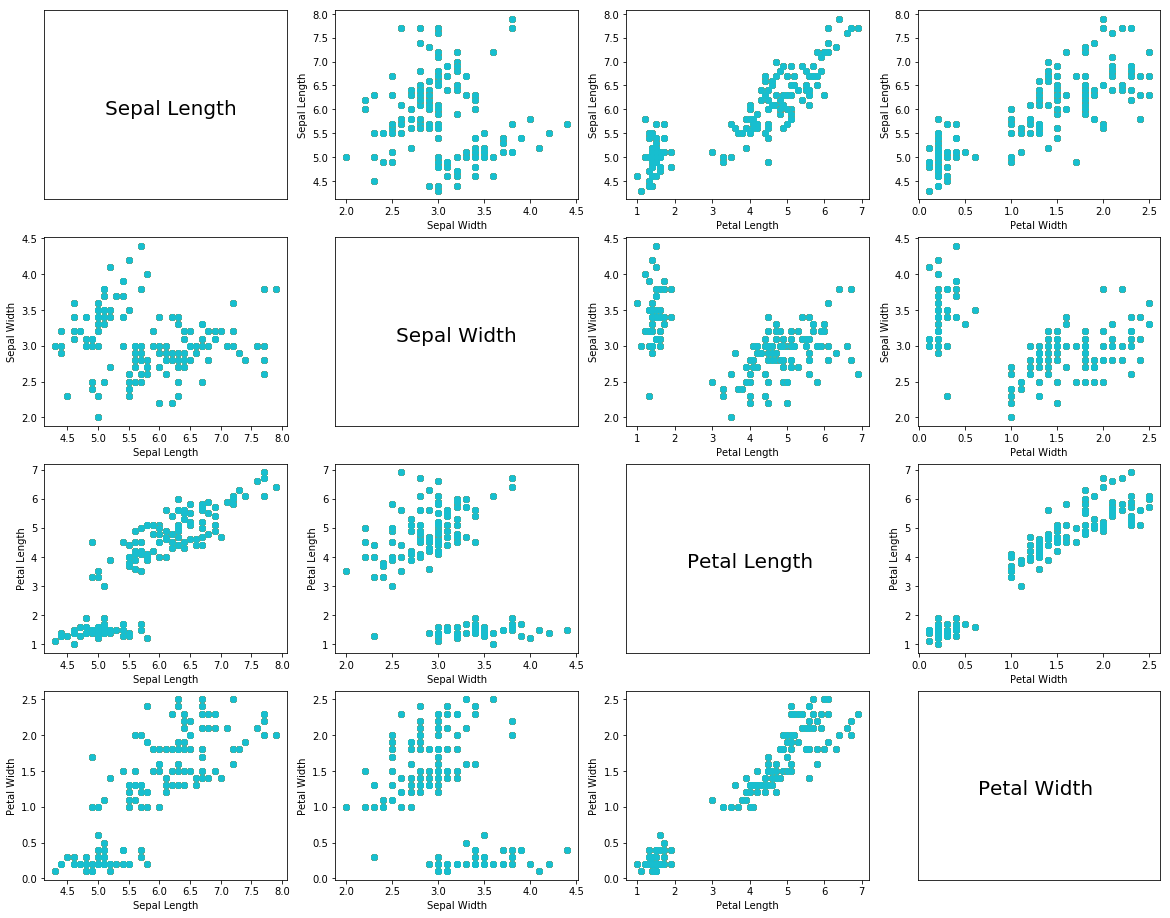

In [74]:
# Visualizing corelation among different pairs of features
# Generating a matrix of scatter plots with one scatter plot for each pairwise combination of features 
pairs(iris)

# Applying Linear Regression 

In [4]:
# Importing some of the libraries and functions
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Loading Iris dataset
iris1 = datasets.load_iris()
data = iris1.data

## Taking pairwise combination of features

### Taking pairwise combination of Sepal Width and Petal Length

Coefficients: 
 [[-1.68852618]]
Mean squared error: 2.28
Variance score: 0.13


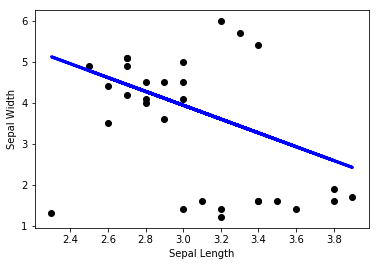

In [158]:
# Taking sepal Width as independent feature
x = data[:, np.newaxis, 1]

# Taking Petal Length as the target variable
y = data[:, np.newaxis, 2]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

# Plot outputs
pl.scatter(x_test, y_test,  color='black')
pl.plot(x_test, y_pred, color='blue', linewidth=3)

pl.xlabel("Sepal Length")
pl.ylabel("Sepal Width")

pl.show()

### Taking pairwise combination of Sepal length and Sepal Width

Coefficients: 
 [[-0.25293077]]
Mean squared error: 0.52
Variance score: -0.02


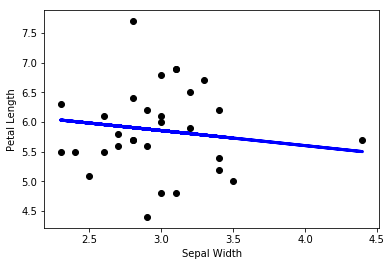

In [159]:
# Taking Sepal Length as independent feature
x = data[:, np.newaxis, 1]

# Taking Sepal Width as the target variable
y = data[:, np.newaxis, 0]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

# Plot outputs
pl.scatter(x_test, y_test,  color='black')
pl.plot(x_test, y_pred, color='blue', linewidth=3)

pl.xlabel("Sepal Width")
pl.ylabel("Petal Length")

pl.show()

### Taking pairwise combination of Petal Length and Petal Width

Coefficients: 
 [[0.41971159]]
Mean squared error: 0.05
Variance score: 0.92


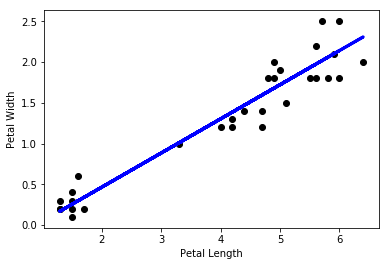

In [5]:
# Taking the first feature Petal Length as independent feature
x = data[:, np.newaxis, 2]

# Taking Petal Width as the target variable
y = data[:, np.newaxis, 3]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

# Plot outputs
pl.scatter(x_test, y_test,  color='black')
pl.plot(x_test, y_pred, color='blue', linewidth=3)

pl.xlabel("Petal Length")
pl.ylabel("Petal Width")

pl.show()

### Taking Pairwise combination of Sepal Length and Petal Length

Coefficients: 
 [[1.92031442]]
Mean squared error: 1.01
Variance score: 0.61


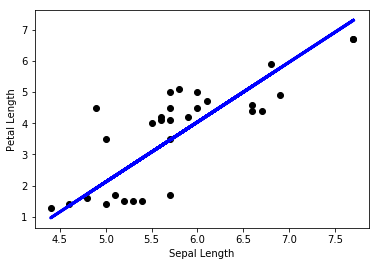

In [161]:
# Taking the first feature Sepal Length as independent feature
x = data[:, np.newaxis, 0]

# Taking Petal Length as the target variable
y = data[:, np.newaxis, 2]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

# Plot outputs
pl.scatter(x_test, y_test,  color='black')
pl.plot(x_test, y_pred, color='blue', linewidth=3)

pl.xlabel("Sepal Length")
pl.ylabel("Petal Length")

pl.show()

### Taking pairwise combination of Sepal Length and Petal Width

Coefficients: 
 [[0.77475979]]
Mean squared error: 0.13
Variance score: 0.69


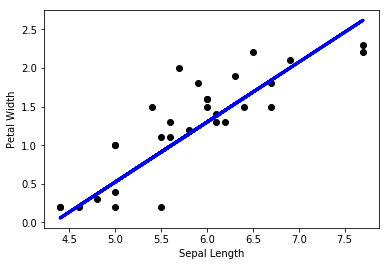

In [162]:
# Taking the first feature Sepal Length as independent feature
x = data[:, np.newaxis, 0]

# Taking Petal Width as the target variable
y = data[:, np.newaxis, 3]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

# Plot outputs
pl.scatter(x_test, y_test,  color='black')
pl.plot(x_test, y_pred, color='blue', linewidth=3)

pl.xlabel("Sepal Length")
pl.ylabel("Petal Width")

pl.show()

### Taking pairwise combination of Sepal Width and Petal Width

Coefficients: 
 [[-0.59481258]]
Mean squared error: 0.41
Variance score: 0.18


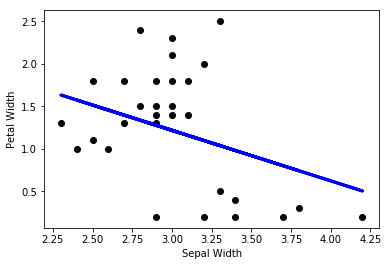

In [163]:
# Taking the first feature Sepal Width as independent feature
x = data[:, np.newaxis, 1]

# Taking Petal Width as the target variable
y = data[:, np.newaxis, 3]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

# Plot outputs
pl.scatter(x_test, y_test,  color='black')
pl.plot(x_test, y_pred, color='blue', linewidth=3)

pl.xlabel("Sepal Width")
pl.ylabel("Petal Width")

pl.show()

## Taking multiple independent features (Multivariate regression)

p.s: I had already done the multivariate portion by the time the announcement was made and thus I am not removing it

### Taking combination of Sepal Length, Petal Length as independent variable and Sepal Width as the target variable

In [49]:
# Taking combination of Sepal Length and Petal Length as independent variables
x = iris[["Sepal Length", "Petal Length"]]

# Taking Sepal Width as the target variable
y = iris[["Sepal Width"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[ 0.58768975 -0.33722853]]
Mean squared error: 0.09
Variance score: 0.48


### Taking combination of Petal Length, Petal Width as independent variable and Sepal Width as the target variable

In [150]:
# Taking combination of Petal Length and Petal Width as independent variables
x = iris[["Petal Length", "Petal Width"]]

# Taking Sepal Width as the target variable
y = iris[["Sepal Width"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[-0.2568723   0.34436541]]
Mean squared error: 0.16
Variance score: 0.05


### Taking combination of Sepal Length, Petal Width as independent variable and Sepal Width as the target variable

In [149]:
# Taking combination of Sepal Length and Petal Width as independent variables
x = iris[["Sepal Length", "Petal Width"]]

# Taking Sepal Width as the target variable
y = iris[["Sepal Width"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[ 0.33132217 -0.47610616]]
Mean squared error: 0.13
Variance score: 0.16


### Taking combination of Sepal Width, Petal Width as independent variable and Sepal Length as the target variable

In [148]:
# Taking combination of Sepal Width and Petal Width as independent variables
x = iris[["Sepal Width", "Petal Width"]]

# Taking Sepal Length as the target variable
y = iris[["Sepal Length"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[0.35327393 0.94870856]]
Mean squared error: 0.12
Variance score: 0.81


### Taking combination of Sepal Width, Petal Length as independent variable and Sepal Length as the target variable

In [147]:
# Taking combination of Sepal Width and Petal Length as independent variables
x = iris[["Sepal Width", "Petal Length"]]

# Taking Sepal Length as the target variable
y = iris[["Sepal Length"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[0.61167923 0.47130083]]
Mean squared error: 0.13
Variance score: 0.82


### Taking combination of Petal Width, Petal Length as independent variable and Sepal Length as the target variable

In [146]:
# Taking combination of Petal Width and Petal Length as independent variables
x = iris[["Petal Width", "Petal Length"]]

# Taking Sepal Length as the target variable
y = iris[["Sepal Length"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[-0.49598663  0.62646434]]
Mean squared error: 0.16
Variance score: 0.73


### Taking combination of Petal Width, Sepal Length as independent variable and Petal Length as the target variable

In [195]:
# Taking combination of Sepal Length and Petal Width as independent variables
x = iris[["Petal Width", "Sepal Length"]]

# Taking Petal Length as the target variable
y = iris[["Petal Length"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[1.71859108 0.55630772]]
Mean squared error: 0.14
Variance score: 0.96


### Taking combination of Sepal Width, Sepal Length as independent variable and Petal Length as the target variable

In [144]:
# Taking combination of Sepal Length and Sepal Width as independent variables
x = iris[["Sepal Width", "Sepal Length"]]

# Taking Petal Length as the target variable
y = iris[["Petal Length"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[-1.17784885  1.8044285 ]]
Mean squared error: 0.50
Variance score: 0.83


### Taking combination of Sepal Width, Petal Width as independent variable and Petal Length as the target variable

In [193]:
# Taking combination of Sepal Width and Petal Width as independent variables
x = iris[["Sepal Width", "Petal Width"]]

# Taking Petal Length as the target variable
y = iris[["Petal Length"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[-0.29811619  2.16485745]]
Mean squared error: 0.18
Variance score: 0.92


### Taking combination of Sepal Width, Petal Length as independent variable and Petal Width as the target variable

In [191]:
# Taking combination of Sepal Width and Petal Length as independent variables
x = iris[["Sepal Width", "Petal Length"]]

# Taking Petal Width as the target variable
y = iris[["Petal Width"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[0.09234337 0.42433497]]
Mean squared error: 0.05
Variance score: 0.90


### Taking combination of Sepal Width, Sepal Length as independent variable and Petal Width as the target variable

In [181]:
# Taking combination of Sepal Width and Sepal Length as independent variables
x = iris[["Sepal Width", "Sepal Length"]]

# Taking Petal Width as the target variable
y = iris[["Petal Width"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[-0.49052543  0.69764667]]
Mean squared error: 0.18
Variance score: 0.75


### Taking combination of Petal Length, Sepal Length as independent variable and Petal Width as the target variable

In [177]:
# Taking combination of Petal Length and Sepal Length as independent variables
x = iris[["Petal Length", "Sepal Length"]]

# Taking Petal Width as the target variable
y = iris[["Petal Width"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[ 0.43119405 -0.05360178]]
Mean squared error: 0.06
Variance score: 0.91


### Taking combination of Petal Length, Sepal Length and Sepal Width as independent variable and Petal Width as the target variable

In [173]:
# Taking combination of Petal Length, Sepal Width and Sepal Length as independent variables
x = iris[["Petal Length", "Sepal Length", "Sepal Width"]]

# Taking Petal Width as the target variable
y = iris[["Petal Width"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[ 0.54464478 -0.25109547  0.24175873]]
Mean squared error: 0.03
Variance score: 0.94


### Taking combination of Petal Width, Sepal Length and Sepal Width as independent variable and Petal Length as the target variable

In [165]:
# Taking combination of Petal Width, Sepal Width and Sepal Length as independent variables
x = iris[["Petal Width", "Sepal Length", "Sepal Width"]]

# Taking Petal Length as the target variable
y = iris[["Petal Length"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[ 1.44292286  0.69696317 -0.68165289]]
Mean squared error: 0.08
Variance score: 0.98


### Taking combination of Petal Width, Petal Length and Sepal Width as independent variable and Sepal Length as the target variable

In [155]:
# Taking combination of Petal Width, Sepal Width and Petal Length as independent variables
x = iris[["Petal Width", "Petal Length", "Sepal Width"]]

# Taking Sepal Length as the target variable
y = iris[["Sepal Length"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[-0.57420546  0.71770545  0.64506322]]
Mean squared error: 0.07
Variance score: 0.91


### Taking combination of Petal Width, Petal Length and Sepal Length as independent variable and Sepal Width as the target variable

In [225]:
# Taking combination of Petal Width, Sepal Length and Petal Length as independent variables
x = iris[["Petal Width", "Petal Length", "Sepal Length"]]

# Taking Sepal Width as the target variable
y = iris[["Sepal Width"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[ 0.54704156 -0.5882224   0.63932159]]
Mean squared error: 0.08
Variance score: 0.43


# Best overall linear regression model 

### Among the pairwise features model

Among the single variable regression model, the one with Petal Length and Petal Width looks the best. The variance is 0.97 while the mean square error is 0.09.

In [7]:
# Taking combination of Petal Width, Sepal Width and Sepal Length as independent variables
x = iris[["Petal Width", "Sepal Length", "Sepal Width"]]

# Taking Petal Length as the target variable
y = iris[["Petal Length"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[ 1.45099315  0.72422574 -0.62720337]]
Mean squared error: 0.09
Variance score: 0.97


### Among multivariate regression models

Among the multivariate regression models, we can say that the linear regression model when Petal Width, Sepal Length and Sepal Width are taken as the independent features while Petal Length is taken as the target feature is the best. It has variance more than 0.96 and mean square error less than 0.05.

In [216]:
# Taking combination of Petal Width, Sepal Width and Sepal Length as independent variables
x = iris[["Petal Width", "Sepal Length", "Sepal Width"]]

# Taking Petal Length as the target variable
y = iris[["Petal Length"]]  

# Dividing data into training and testing sets
# keeping 80% as the training data and rest 20% as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generating linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Generating model and its statistics

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


Coefficients: 
 [[ 1.46243877  0.71524652 -0.63380361]]
Mean squared error: 0.05
Variance score: 0.98


# Questions

Based upon the linear models you generated, which pair of features appear to be most
predictive for one another? Note that you can answer this question based upon the output
provided for the linear models.

Based on the linear models generated, Petal Length and Petal Width appears to be the most predictive for each other. We can say this from the statistics associated with the linear regression model. It has variance more than 0.9 (1 means perfect corelation and mean square error less than 0.05). We can also see this from the scatter plot. The scatter plot of paiwise combination of Petal Length and Petal Width appears to be quite a smooth one with the points appearing in a slant straight line fashion suggesting that the two features almost go hand-in-hand.

Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

It would affect the classification performance adversely. The feature that can be predicted the best based on other features is very important for the classification process. It means that that particular feature is the most co-related with the rest of the features. Thus, removing it will affect classification adversely and would give out wrong classification results for many instances.